In [26]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

covid_df = pd.read_csv('multivariate_eng_df.csv')
covid_df

,Unnamed: 0,Date,STATE,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,...,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus,AGE04_29_TOT,AGE30_59_TOT,AGE60PLUS_TOT
0,3160,2020-03-01,6,California,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
1,3161,2020-03-02,6,California,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2,3162,2020-03-03,6,California,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
3,3163,2020-03-04,6,California,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
4,3164,2020-03-05,6,California,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,33965,2022-04-25,48,Texas,25120.6,20890120.0,20884105.0,19864532.0,18040473.0,3628247.0,...,0.585664,0.219948,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
7896,33966,2022-04-26,48,Texas,25120.6,20897363.0,20891339.0,19869792.0,18044864.0,3628950.0,...,0.585804,0.221604,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
7897,33967,2022-04-27,48,Texas,25120.6,20907738.0,20901703.0,19877395.0,18051163.0,3630034.0,...,0.586023,0.221844,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
7898,33968,2022-04-28,48,Texas,25120.6,20914938.0,20908897.0,19883027.0,18056005.0,3631069.0,...,0.586204,0.222099,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861


In [27]:
covid_df.columns.values

array(['Unnamed: 0', 'Date', 'STATE', 'PROVINCE_STATE_NAME',
       'Completeness_pct', 'Administered_Dose1_Recip',
       'Administered_Dose1_Recip_5Plus',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_65Plus', 'Series_Complete_Yes',
       'Series_Complete_5Plus', 'Series_Complete_5to17',
       'Series_Complete_12Plus', 'Series_Complete_18Plus',
       'Series_Complete_65Plus', 'Booster_Doses', 'Booster_Doses_5Plus',
       'Booster_Doses_12Plus', 'Booster_Doses_18Plus',
       'Booster_Doses_50Plus', 'Booster_Doses_65Plus',
       'Second_Booster_50Plus', 'Second_Booster_65Plus',
       'Bivalent_Booster_5Plus', 'Bivalent_Booster_12Plus',
       'Bivalent_Booster_18Plus', 'Bivalent_Booster_65Plus',
       'PEOPLE_DEATH_NEW_COUNT', 'PEOPLE_POSITIVE_NEW_CASES_COUNT',
       'TOT_POP', 'WA_MALE', 'WA_FEMALE', 'BA_MALE', 'BA_FEMALE',
       'IA_MALE', 'IA_FEMALE', 'AA_MALE', 'AA_FEMALE', 'NA_MALE',
       'NA_FEMALE

In [17]:
columns_to_drop = ['Unnamed: 0', 'STATE']
covid_df = covid_df.drop(columns=columns_to_drop)
covid_df

,Date,PROVINCE_STATE_NAME,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_18Plus,Administered_Dose1_Recip_65Plus,Series_Complete_Yes,Series_Complete_5Plus,...,vaccination_rate_complete,booster_rate,prop_age04,prop_age59,prop_age6064,prop_age8084,prop_age85plus,AGE04_29_TOT,AGE30_59_TOT,AGE60PLUS_TOT
0,2020-03-01,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
1,2020-03-02,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
2,2020-03-03,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
3,2020-03-04,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
4,2020-03-05,California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,5.744418,6.165309,5.818187,1.716470,1.860398,13077768,15818572,8169914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7895,2022-04-25,Texas,25120.6,20890120.0,20884105.0,19864532.0,18040473.0,3628247.0,17587233.0,17585807.0,...,0.585664,0.219948,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
7896,2022-04-26,Texas,25120.6,20897363.0,20891339.0,19869792.0,18044864.0,3628950.0,17591452.0,17590025.0,...,0.585804,0.221604,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
7897,2022-04-27,Texas,25120.6,20907738.0,20901703.0,19877395.0,18051163.0,3630034.0,17598026.0,17596598.0,...,0.586023,0.221844,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861
7898,2022-04-28,Texas,25120.6,20914938.0,20908897.0,19883027.0,18056005.0,3631069.0,17603464.0,17602036.0,...,0.586204,0.222099,6.335885,6.946010,5.387383,1.469608,1.337448,10530755,11768099,5644861


<BarContainer object of 7900 artists>

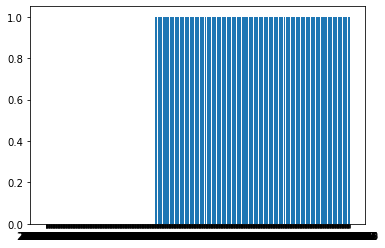

In [30]:
plt.bar(covid_df['Date'], covid_df['Vaccine_available'])

<BarContainer object of 7900 artists>

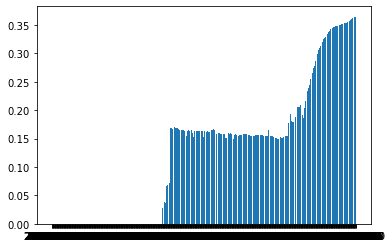

In [31]:
plt.bar(covid_df['Date'], covid_df['booster_rate'])

<BarContainer object of 7900 artists>

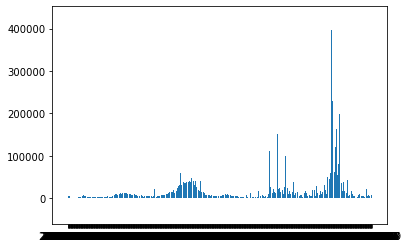

In [32]:
plt.bar(covid_df['Date'], covid_df['new_cases_7_lag'])

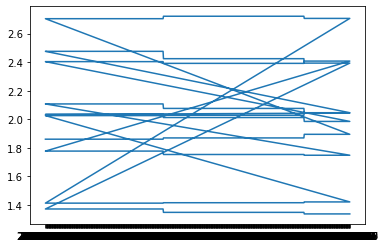

In [35]:
plt.plot(covid_df['Date'], covid_df['prop_age85plus'])

In [37]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as sm
import itertools
import time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings("ignore")

In [60]:
columns_to_drop_1 = ['PEOPLE_POSITIVE_NEW_CASES_COUNT', 'new_cases_1 lag', 'Date', 'PROVINCE_STATE_NAME', 'new_cases_2_lag',
       'new_cases_3_lag', 'new_cases_4_lag','new_deaths_50_mean', 'new_deaths_100_mean', 'new_deaths_10_std',
       'new_deaths_50_std', 'new_deaths_100_std', 'new_deaths_10_max',
       'new_deaths_50_max', 'new_deaths_100_max', 'new_deaths_10_min',
       'new_deaths_50_min', 'new_deaths_100_min', 'NHWA_MALE', 'NHWA_FEMALE', 'NHBA_MALE', 'NHBA_FEMALE',
       'NHIA_MALE', 'NHIA_FEMALE', 'NHAA_MALE', 'NHAA_FEMALE',
       'NHNA_MALE', 'NHNA_FEMALE', 'NHTOM_MALE', 'NHTOM_FEMALE',
       'NHWAC_MALE', 'NHWAC_FEMALE', 'NHBAC_MALE', 'NHBAC_FEMALE',
       'NHIAC_MALE', 'NHIAC_FEMALE', 'NHAAC_MALE', 'NHAAC_FEMALE',
       'NHNAC_MALE', 'NHNAC_FEMALE', 'H_MALE', 'H_FEMALE', 'HWA_MALE',
       'HWA_FEMALE', 'HBA_MALE', 'HBA_FEMALE', 'HIA_MALE', 'HIA_FEMALE',
       'HAA_MALE', 'HAA_FEMALE', 'HNA_MALE', 'HNA_FEMALE', 'HTOM_MALE',
       'HTOM_FEMALE', 'HWAC_MALE', 'HWAC_FEMALE', 'HBAC_MALE',
       'HBAC_FEMALE', 'HIAC_MALE', 'HIAC_FEMALE', 'HAAC_MALE',
       'HAAC_FEMALE', 'HNAC_MALE', 'HNAC_FEMALE'
                    
                    ]
X = covid_df.drop(columns=columns_to_drop_1)
y = covid_df['PEOPLE_POSITIVE_NEW_CASES_COUNT']

In [54]:
#Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = sm.ols('PEOPLE_POSITIVE_NEW_CASES_COUNT~' + '+'.join(predictor_subset),data = covid_df).fit()
    Rsquared = model.rsquared
    return {"model":model, "Rsquared":Rsquared}

In [55]:
#Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    return best_model

In [56]:
def forward_selection():
    models_best = pd.DataFrame(columns=["Rsquared", "model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [61]:
models_best = forward_selection()

Processed  118 models on 1 predictors in 1.1387779712677002 seconds.
Processed  117 models on 2 predictors in 1.1730072498321533 seconds.
Processed  116 models on 3 predictors in 1.5263659954071045 seconds.
Processed  115 models on 4 predictors in 1.8547732830047607 seconds.
Processed  114 models on 5 predictors in 2.147212505340576 seconds.
Processed  113 models on 6 predictors in 2.2479681968688965 seconds.
Processed  112 models on 7 predictors in 2.73299503326416 seconds.
Processed  111 models on 8 predictors in 2.8098604679107666 seconds.
Processed  110 models on 9 predictors in 2.99830961227417 seconds.
Processed  109 models on 10 predictors in 3.282224178314209 seconds.
Processed  108 models on 11 predictors in 3.7615621089935303 seconds.
Processed  107 models on 12 predictors in 3.891829490661621 seconds.
Processed  106 models on 13 predictors in 4.368333339691162 seconds.
Processed  105 models on 14 predictors in 4.1464293003082275 seconds.
Processed  104 models on 15 predictor

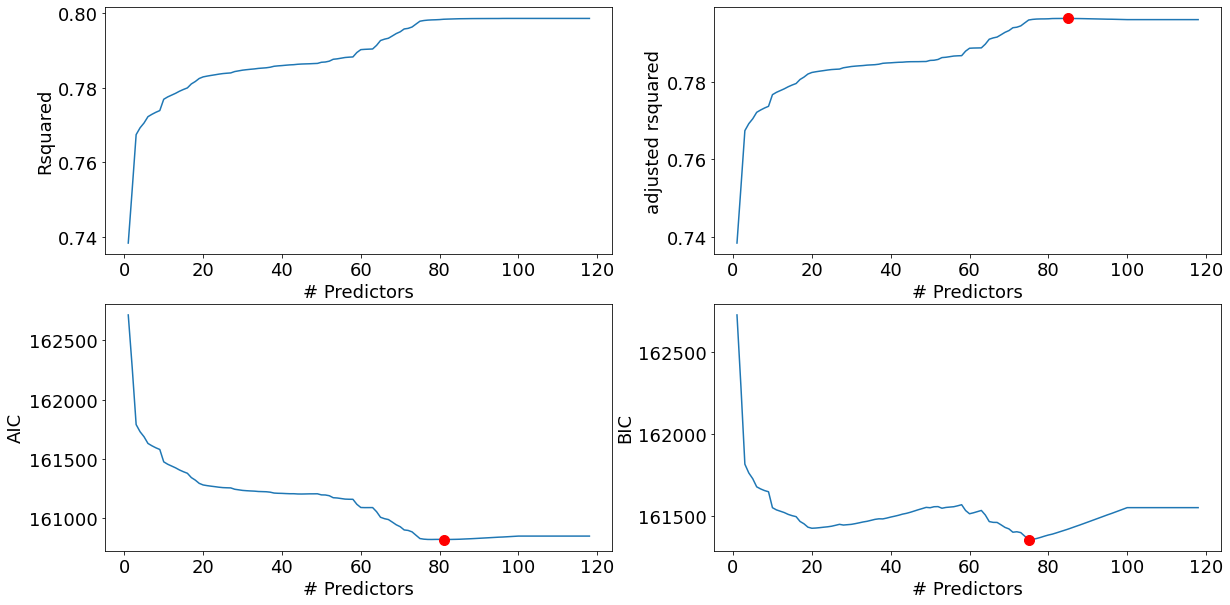

In [63]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    plt.plot(models_best["Rsquared"])
    plt.xlabel('# Predictors')
    plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

    rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    plt.subplot(2, 2, 2)
    plt.plot(rsquared_adj)
    plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()

In [67]:
models_best['Rsquared'] = pd.to_numeric(models_best['Rsquared'])
best_model_features = models_best.loc[models_best['Rsquared'].idxmax()]["model"].params.index[1:]
print(X[best_model_features].columns.values)
print(len(X[best_model_features].columns.values))

['new_cases_7_lag' 'new_cases_10_mean' 'new_cases_50_mean'
 'Series_Complete_5Plus' 'new_cases_10_min' 'new_hospitalized_patients'
 'new_cases_100_min' 'new_cases_50_lag' 'new_cases_50_max'
 'new_cases_50_std' 'new_cases_10_max' 'new_cases_100_std'
 'Booster_Doses_18Plus' 'PEOPLE_DEATH_NEW_COUNT' 'new_cases_100_max'
 'AAC_FEMALE' 'Series_Complete_5to17' 'Booster_Doses_12Plus'
 'new_cases_100_mean' 'booster_rate' 'international_travel_controls'
 'new_cases_10_std' 'new_deaths_10_mean' 'BAC_MALE' 'relative_humidity'
 'new_cases_50_min' 'vaccination_rate_complete' 'Series_Complete_65Plus'
 'vaccination_policy' 'Completeness_pct' 'Booster_Doses' 'income_support'
 'school_closing' 'workplace_closing' 'testing_policy' 'prop_age59'
 'AA_MALE' 'prop_age04' 'Administered_Dose1_Recip_65Plus'
 'vaccination_rate_1dose' 'public_transport_closing'
 'Booster_Doses_65Plus' 'stay_at_home_requirements' 'debt_relief'
 'restrictions_on_gatherings' 'new_deaths_7_lag' 'prop_age6064'
 'BA_FEMALE' 'AGE30_59_T